<a href="https://colab.research.google.com/github/Dhavalkumar510/Final_Year_Project_UH/blob/main/Final_Year_Project_UH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing necessary Libraray Functions

In [1]:
pip install yfinance

In [2]:
import yfinance as yf
import itertools
from datetime import datetime
import numpy as np
import pandas as pd
import seaborn as sns
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Bidirectional, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
from tensorflow.keras.layers import LSTM, SimpleRNN, Dense, Dropout
from keras.utils import plot_model
from sklearn.metrics import mean_squared_error
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.utils import plot_model
import matplotlib.image as mpimg
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import math


In [3]:
# Define the stock ticker (Lloyds Banking Group PLC)
ticker = 'LLOY.L'

# Get today's date in dd-mm-yyyy format
today = datetime.today().strftime('%d-%m-%Y')

# Fetch historical data until today
yf_data = yf.download(ticker, start='2010-01-01', end=datetime.today().strftime('%Y-%m-%d'))

# Convert the index to dd-mm-yyyy format
yf_data.index = yf_data.index.strftime('%d-%m-%Y')

data = yf_data

# Display the DataFrame

print(pd.DataFrame(data.head(15)))

print(pd.DataFrame(data.tail(15)))

[*********************100%***********************]  1 of 1 completed

Price       Adj Close      Close       High        Low       Open     Volume
Ticker         LLOY.L     LLOY.L     LLOY.L     LLOY.L     LLOY.L     LLOY.L
Date                                                                        
04-01-2010  36.779499  52.259998  52.259998  51.099998  51.400002  167623403
05-01-2010  38.025185  54.029999  54.759998  52.200001  52.500000  233026957
06-01-2010  38.419304  54.590000  55.230000  53.169998  55.000000  142079248
07-01-2010  40.066151  56.930000  57.070000  54.000000  54.860001  216171360
08-01-2010  40.045033  56.900002  57.520000  56.160000  56.990002  178033888
11-01-2010  39.503124  56.130001  57.950001  55.630001  57.799999  169834032
12-01-2010  39.390514  55.970001  56.290001  55.080002  55.590000  189050155
13-01-2010  39.411633  56.000000  56.200001  55.160000  55.639999  117598072
14-01-2010  40.467300  57.500000  58.000000  56.580002  57.000000  225878876
15-01-2010  39.960575  56.779999  58.509998  56.599998  57.709999  241352597

In [4]:
print("Missing values before handling:")
print(data.isnull().sum())

Missing values before handling:
Price      Ticker
Adj Close  LLOY.L    0
Close      LLOY.L    0
High       LLOY.L    0
Low        LLOY.L    0
Open       LLOY.L    0
Volume     LLOY.L    0
dtype: int64


In [5]:
# Save data to a CSV file
data.to_csv("Lloyds_Bank_Data.csv")

# Opening Price

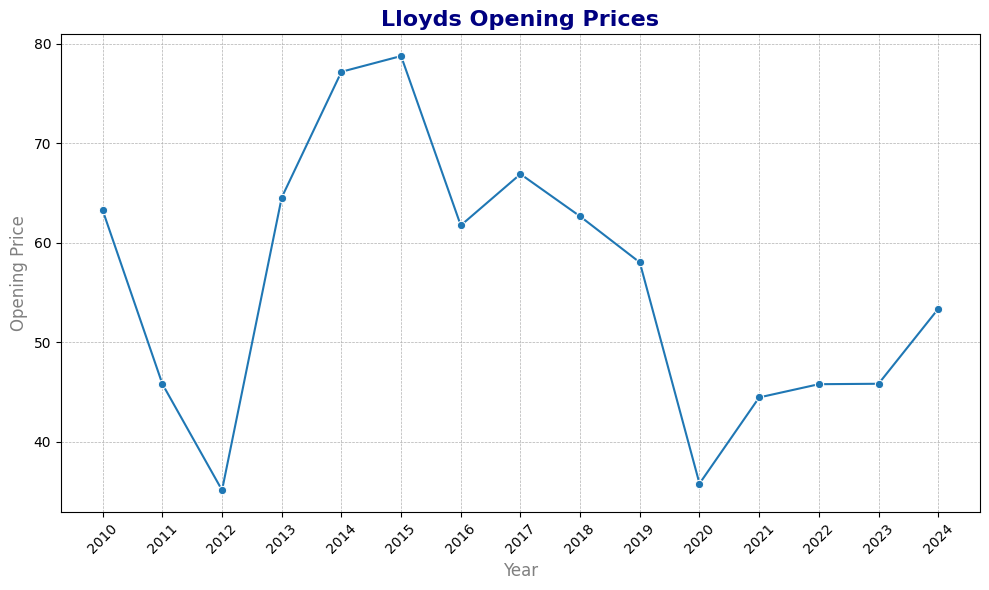

In [6]:
data.index = pd.to_datetime(data.index, format='%d-%m-%Y')
years = data.index.year

# Plot Opening Prices
plt.figure(figsize=(10, 6))
sns.lineplot(x=years, y=data['Open'].values.ravel(),
             color='#1f77b4', marker='o', errorbar=None)
plt.title('Lloyds Opening Prices', fontsize=16, color='navy', weight='bold')
plt.xlabel('Year', fontsize=12, color='gray')
plt.ylabel('Opening Price', fontsize=12, color='gray')

# Set x-ticks to show unique years
plt.xticks(ticks=range(years.min(), years.max() + 1), rotation=45)

plt.grid(visible=True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

# Closing Price

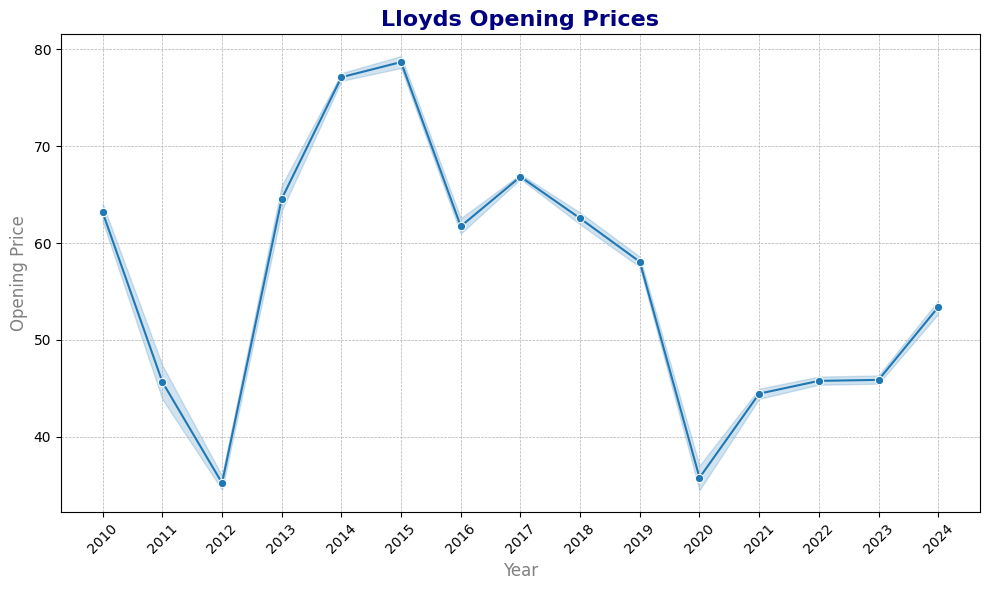

In [7]:
data.index = pd.to_datetime(data.index, format='%d-%m-%Y')
years = data.index.year

# Plot Opening Prices
plt.figure(figsize=(10, 6))
sns.lineplot(x=years, y=data['Close'].values.ravel(), color='#1f77b4', marker='o')
plt.title('Lloyds Opening Prices', fontsize=16, color='navy', weight='bold')
plt.xlabel('Year', fontsize=12, color='gray')
plt.ylabel('Opening Price', fontsize=12, color='gray')

# Set x-ticks to show unique years
plt.xticks(ticks=range(years.min(), years.max() + 1), rotation=45)
plt.grid(visible=True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

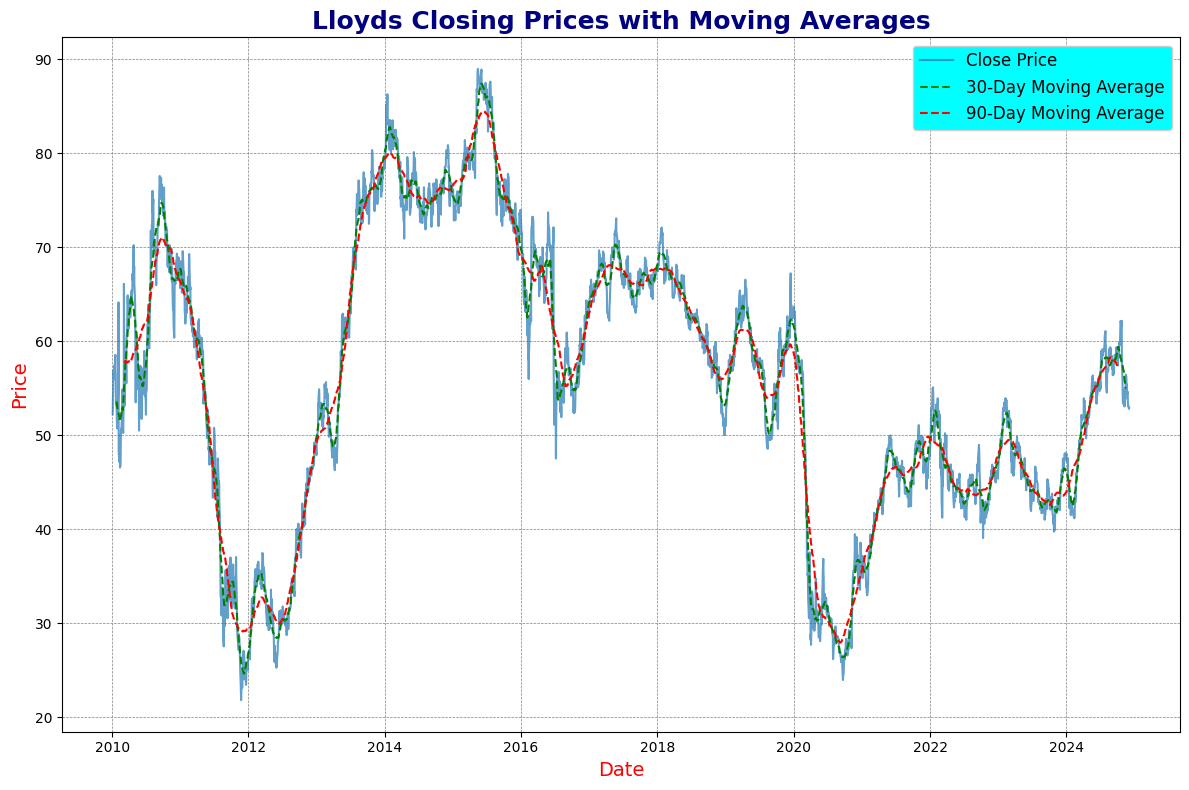

In [8]:
import matplotlib.pyplot as plt

# Ensure the index is in datetime format
data.index = pd.to_datetime(data.index, format='%d-%m-%Y')

# Calculate Moving Averages
data['MA_30'] = data['Close'].rolling(window=30, center=True).mean()  # 30-day moving average
data['MA_90'] = data['Close'].rolling(window=90, center=True).mean()  # 90-day moving average

# Plot Close Prices with Moving Averages
plt.figure(figsize=(12, 8))
# Plot the data
plt.plot(data.index, data['Close'], label='Close Price', color='#1f77b4', alpha=0.7, linewidth=1.5)  # Blue for close price
plt.plot(data.index, data['MA_30'], label='30-Day Moving Average', color='green', linestyle='--', linewidth=1.5)  # Orange for MA_30
plt.plot(data.index, data['MA_90'], label='90-Day Moving Average', color='red', linestyle='--', linewidth=1.5)  # Green for MA_90

# Add labels and title
plt.title('Lloyds Closing Prices with Moving Averages', fontsize=18, color='navy', weight='bold')
plt.xlabel('Date', fontsize=14, color='Red')
plt.ylabel('Price', fontsize=14, color='Red')

# Add a legend with a colored box
legend = plt.legend(frameon=True, loc='upper right', fontsize=12)
frame = legend.get_frame()
frame.set_facecolor('cyan')
frame.set_alpha(1)
# Add grid
plt.grid(visible=True, linestyle='--', linewidth=0.5, color='gray')

# Adjust layout and show plot
plt.tight_layout()
plt.show()


# LSTM Model

In [9]:
# Scale the Close Prices
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

# Prepare data for LSTM
def create_lstm_dataset(dataset, time_step=15):
    X, y = [], []
    for i in range(len(dataset) - time_step):
        X.append(dataset[i:i + time_step])
        y.append(dataset[i + time_step])
    return np.array(X), np.array(y)

# Define time step for sequence
time_step = 15
X, y = create_lstm_dataset(scaled_data, time_step)

# Split data into train and test sets
train_size = int(len(X) * 0.8)
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

# Build the LSTM model
model = Sequential([
    Bidirectional(LSTM(100, return_sequences=True, input_shape=(time_step, 1))),
    Dropout(0.3),
    BatchNormalization(),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25, activation='relu', kernel_regularizer='l2'),
    Dense(1)
])

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')

model.build(input_shape=(None, time_step, 1))

# Visualize the model architecture
plot_model(model, show_shapes=True, show_layer_names=True, to_file='lstm_architecture.png')

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 21s 83ms/step - loss: 0.3380
Epoch 2/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 7s 77ms/step - loss: 0.1520
Epoch 3/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0742
Epoch 4/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - loss: 0.0371
Epoch 5/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0209
Epoch 6/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0124
Epoch 7/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 7s 54ms/step - loss: 0.0103
Epoch 8/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - loss: 0.0079
Epoch 9/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.0058
Epoch 10/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - loss: 0.0049
Epoch 11/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0044
Epoch 12/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0038
Epoch 13/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0034
Epoch 14/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0028
Epoch 15/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 7s 52ms/step - loss: 0.0027
Epo

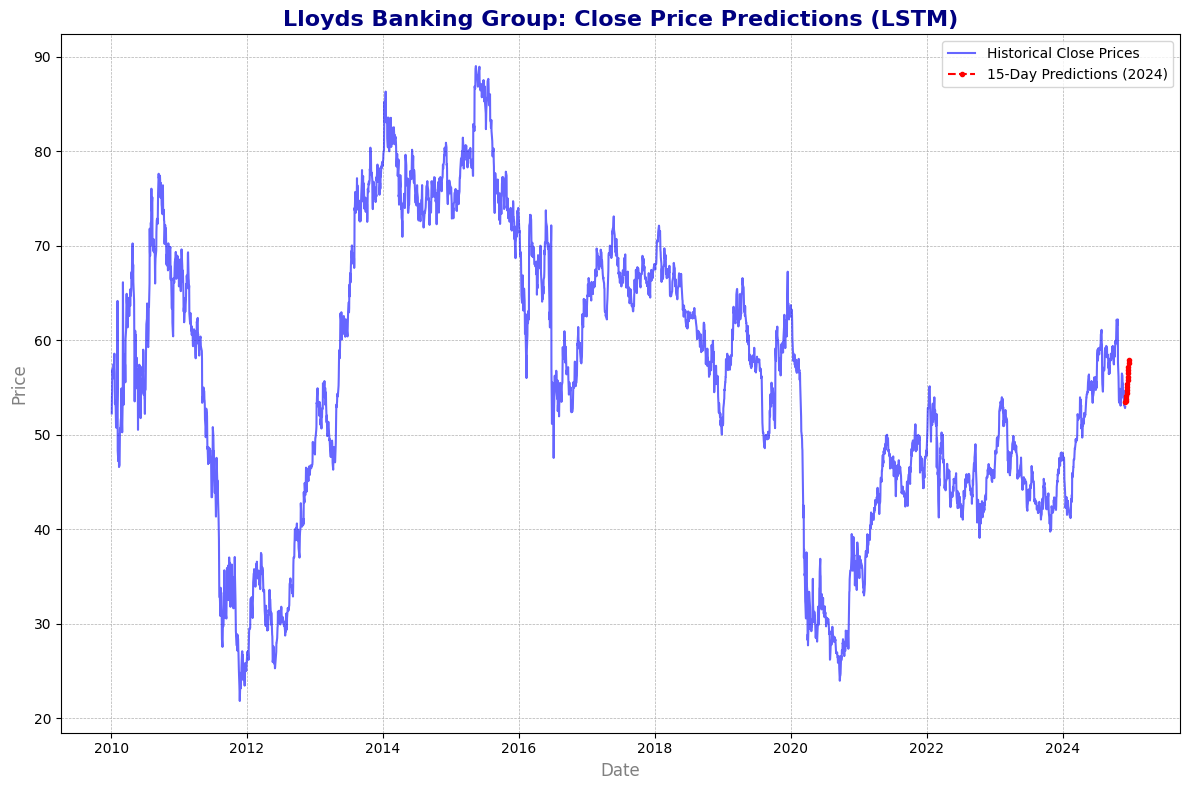

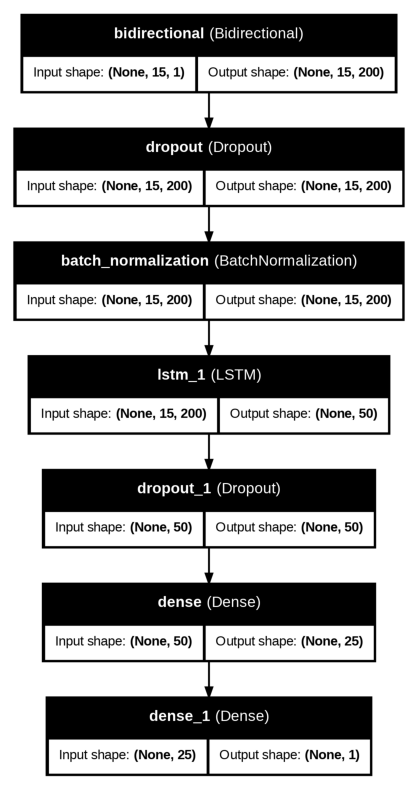

         Date  Predicted Close
0  2024-12-04        53.447056
1  2024-12-05        53.585300
2  2024-12-06        53.797482
3  2024-12-09        54.070301
4  2024-12-10        54.376835
5  2024-12-11        54.703316
6  2024-12-12        55.052204
7  2024-12-13        55.412891
8  2024-12-16        55.778152
9  2024-12-17        56.149467
10 2024-12-18        56.510357
11 2024-12-19        56.864346
12 2024-12-20        57.209854
13 2024-12-23        57.541660
14 2024-12-24        57.856983


In [10]:
# Predict future values for the next 15 business days using the most recent sequence
last_sequence = scaled_data[-time_step:]
future_predictions = []

for _ in range(15):
    prediction = model.predict(last_sequence.reshape(1, time_step, 1), verbose=0)
    future_predictions.append(prediction[0, 0])
    last_sequence = np.append(last_sequence[1:], prediction, axis=0)

# Inverse scale the predictions back to the original scale
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Generate future dates starting from the last available date
future_dates = pd.date_range(start=data.index[-1], periods=16, freq='B')[1:]  # Exclude the last date

# Create a DataFrame for future predictions
future_df = pd.DataFrame({'Date': future_dates, 'Predicted Close': future_predictions.ravel()})

# Plot the predictions
plt.figure(figsize=(12, 8))
plt.plot(data.index, data['Close'], label='Historical Close Prices', color='blue', alpha=0.6)
plt.plot(future_df['Date'], future_df['Predicted Close'], label='15-Day Predictions (2024)', color='red', linestyle='--', marker='.')
plt.title('Lloyds Banking Group: Close Price Predictions (LSTM)', fontsize=16, color='navy', weight='bold')
plt.xlabel('Date', fontsize=12, color='gray')
plt.ylabel('Price', fontsize=12, color='gray')
plt.legend()
plt.grid(visible=True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

# Display the LSTM model architecture image
img = mpimg.imread('lstm_architecture.png')
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.show()

# Print predicted values
print(future_df)


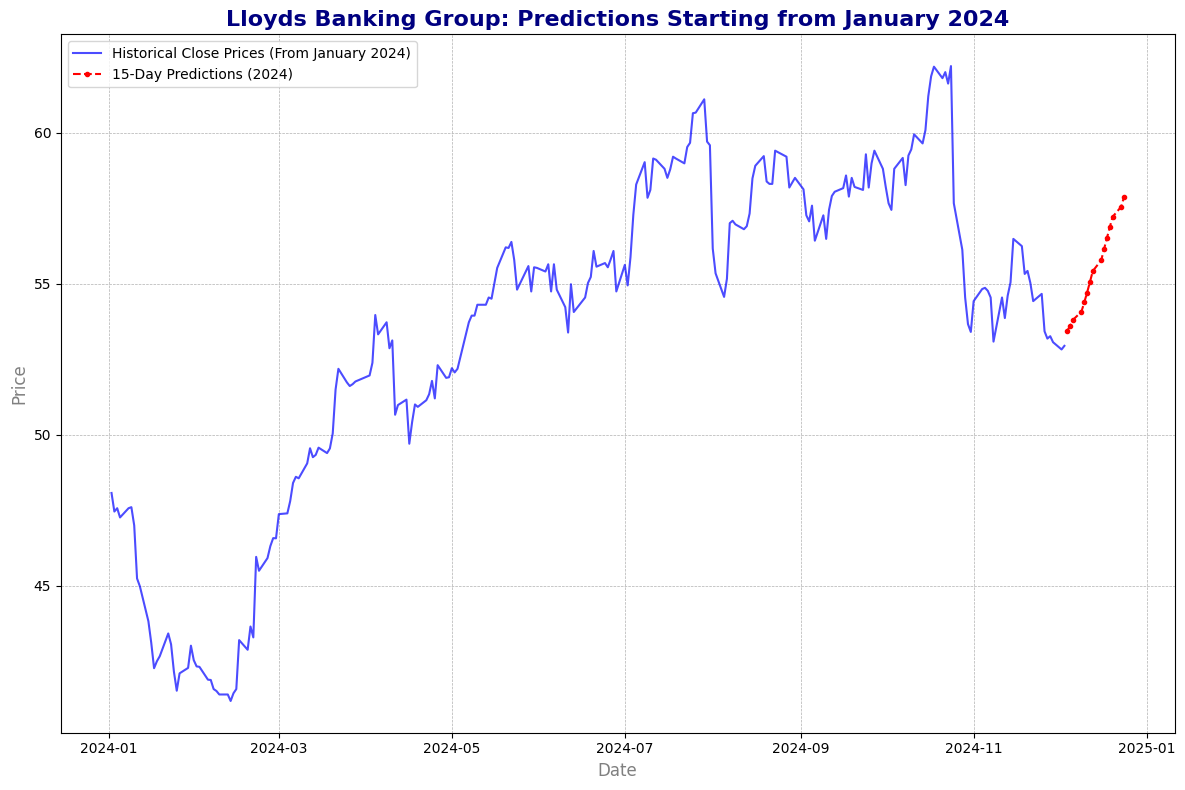

In [11]:
# Convert the index to datetime format (if not already done)
data.index = pd.to_datetime(data.index, format='%d-%m-%Y')

# Filter data starting from January 1, 2024
filtered_data = data[data.index >= '2024-01-01']

# Plot the subset data with predictions
plt.figure(figsize=(12, 8))
plt.plot(filtered_data.index, filtered_data['Close'], label='Historical Close Prices (From January 2024)', color='blue', alpha=0.7)
plt.plot(future_df['Date'], future_df['Predicted Close'], label='15-Day Predictions (2024)', color='red', linestyle='--', marker='.')
plt.title('Lloyds Banking Group: Predictions Starting from January 2024', fontsize=16, color='navy', weight='bold')
plt.xlabel('Date', fontsize=12, color='gray')
plt.ylabel('Price', fontsize=12, color='gray')
plt.legend()
plt.grid(visible=True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
Test Evaluation Metrics:
Mean Squared Error (MSE): 1.9808
Root Mean Squared Error (RMSE): 1.4074
Mean Absolute Error (MAE): 1.0969
R-squared (R²): 0.9328


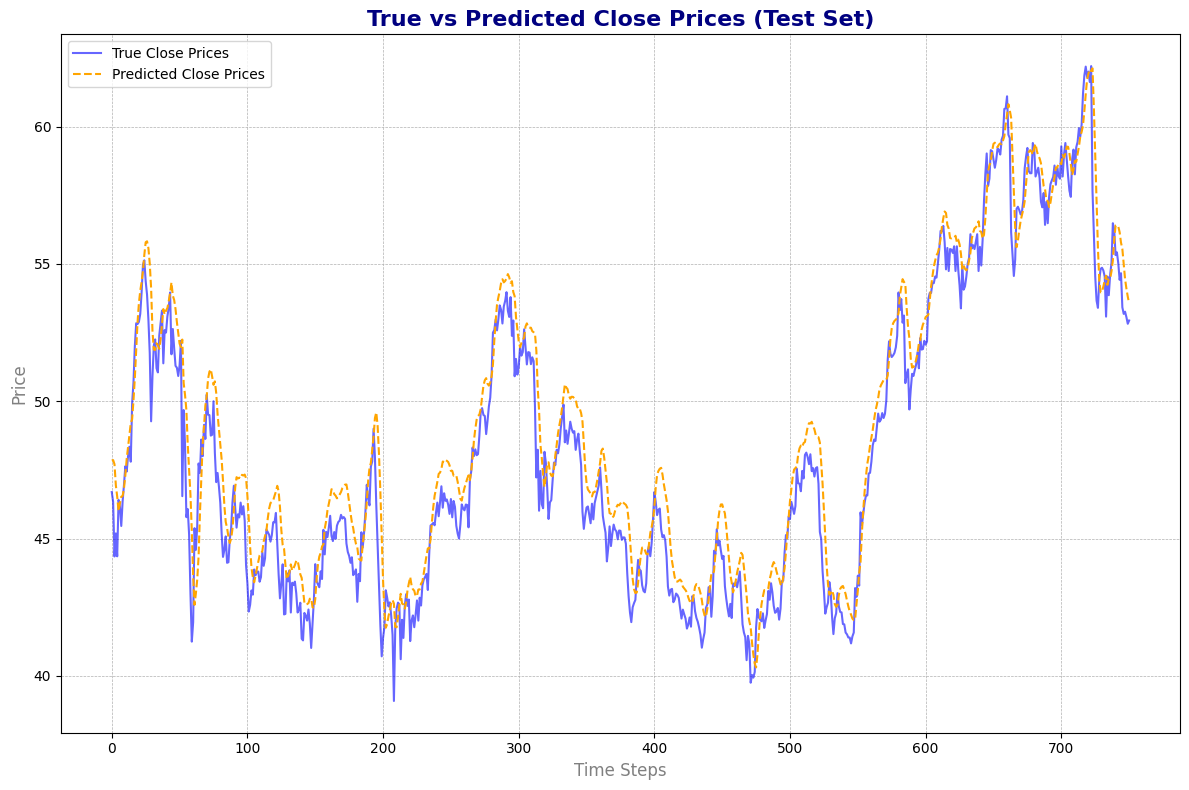

In [12]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import math

# Make predictions on the test set
y_pred = model.predict(X_test)

# Inverse transform the scaled predictions and true values
y_pred_original = scaler.inverse_transform(y_pred)
y_test_original = scaler.inverse_transform(y_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test_original, y_pred_original)
rmse = math.sqrt(mse)
mae = mean_absolute_error(y_test_original, y_pred_original)
r2 = r2_score(y_test_original, y_pred_original)

# Print the evaluation metrics
print("Test Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R²): {r2:.4f}")

# Plot true vs predicted prices for the test set
plt.figure(figsize=(12, 8))
plt.plot(y_test_original, label='True Close Prices', color='blue', alpha=0.6)
plt.plot(y_pred_original, label='Predicted Close Prices', color='orange', linestyle='--')
plt.title('True vs Predicted Close Prices (Test Set)', fontsize=16, color='navy', weight='bold')
plt.xlabel('Time Steps', fontsize=12, color='gray')
plt.ylabel('Price', fontsize=12, color='gray')
plt.legend()
plt.grid(visible=True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


#ARIMA Model

In [13]:
pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 26.4 MB/s eta 0:00:00


Searching for best ARIMA/SARIMA parameters...


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(9, 0, 9)x(0, 0, 0, 12) - AIC: 11676.928224609064


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(9, 0, 9)x(0, 0, 1, 12) - AIC: 11581.360351746967


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(9, 0, 9)x(0, 1, 0, 12) - AIC: 13100.38790121557


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(9, 0, 9)x(0, 1, 1, 12) - AIC: 11541.07675247836


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(9, 0, 9)x(1, 0, 0, 12) - AIC: 11619.518909453418


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(9, 0, 9)x(1, 0, 1, 12) - AIC: 11551.043413284737


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(9, 0, 9)x(1, 1, 0, 12) - AIC: 12403.87420864034


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(9, 0, 9)x(1, 1, 1, 12) - AIC: 11551.59512534835


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(9, 1, 9)x(0, 0, 0, 12) - AIC: 11588.73314210977


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(9, 1, 9)x(0, 0, 1, 12) - AIC: 11446.894998514228


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(9, 1, 9)x(0, 1, 0, 12) - AIC: 12523.59282543791


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(9, 1, 9)x(0, 1, 1, 12) - AIC: 11508.167982888215


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(9, 1, 9)x(1, 0, 0, 12) - AIC: 11466.631186704919


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(9, 1, 9)x(1, 0, 1, 12) - AIC: 11435.161068858779


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(9, 1, 9)x(1, 1, 0, 12) - AIC: 11995.42404200128


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(9, 1, 9)x(1, 1, 1, 12) - AIC: 11515.2249123625

Best ARIMA/SARIMA Model Found:
Order: (9, 1, 9), Seasonal Order: (1, 0, 1, 12) with AIC: 11435.161068858779


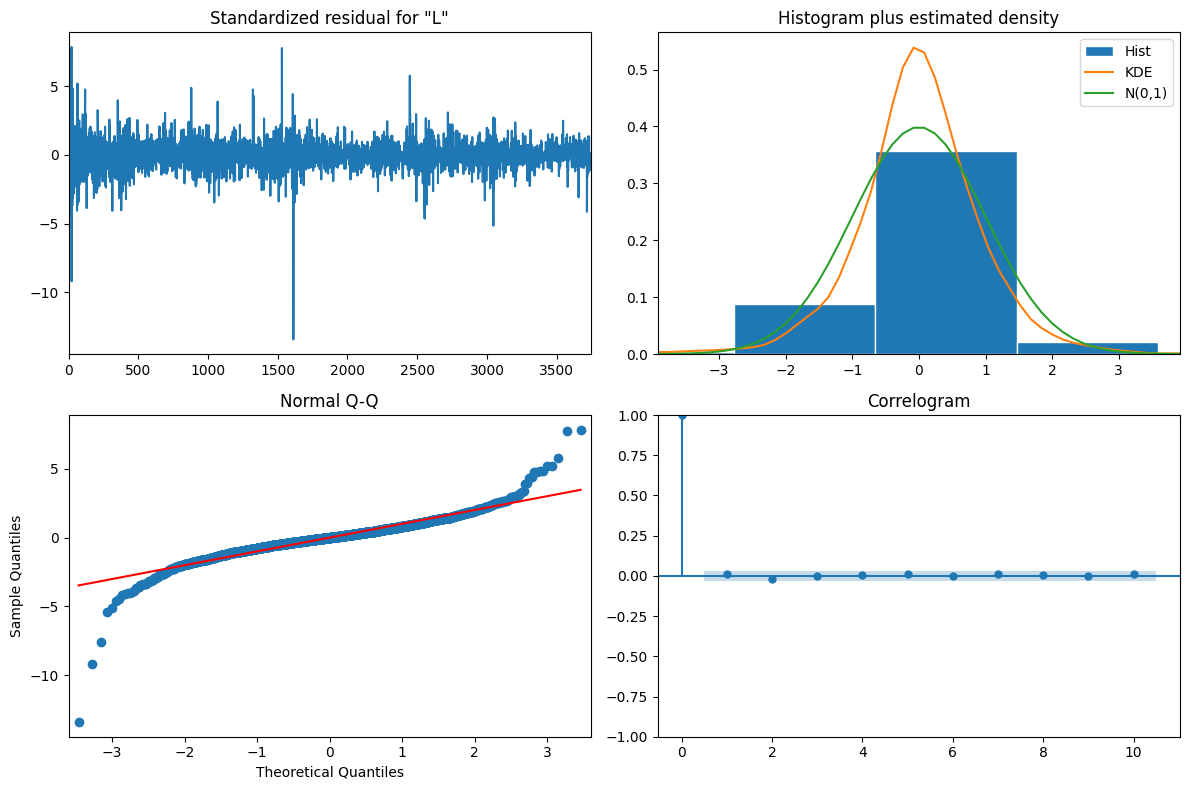

In [14]:
# Making a datacopy which can be used to bulid a model

data1 =data.copy()

# Extract the 'Close' prices for time series analysis
close_prices = data1['Close']

p = q = range(9, 10)
d = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in itertools.product(range(0, 2),
                                                                  range(0, 2),
                                                                  range(0, 2))]

min_aic = float('inf')
best_order = None
best_seasonal_order = None
best_model = None

print("Searching for best ARIMA/SARIMA parameters...")
for param in pdq:
    for seasonal_param in seasonal_pdq:
        try:
            model = SARIMAX(close_prices, order=param,
                            seasonal_order=seasonal_param,
                            enforce_stationarity=False,
                            enforce_invertibility=False)
            results = model.fit(disp=False)
            if results.aic < min_aic:
                min_aic = results.aic
                best_order = param
                best_seasonal_order = seasonal_param
                best_model = results
            print(f"ARIMA{param}x{seasonal_param} - AIC: {results.aic}")
        except Exception as e:
            continue

print("\nBest ARIMA/SARIMA Model Found:")
print(f"Order: {best_order}, Seasonal Order: {best_seasonal_order} with AIC: {min_aic}")

# Step 5: Residual Diagnostics
best_model.plot_diagnostics(figsize=(12, 8))
plt.tight_layout()
plt.show()



/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


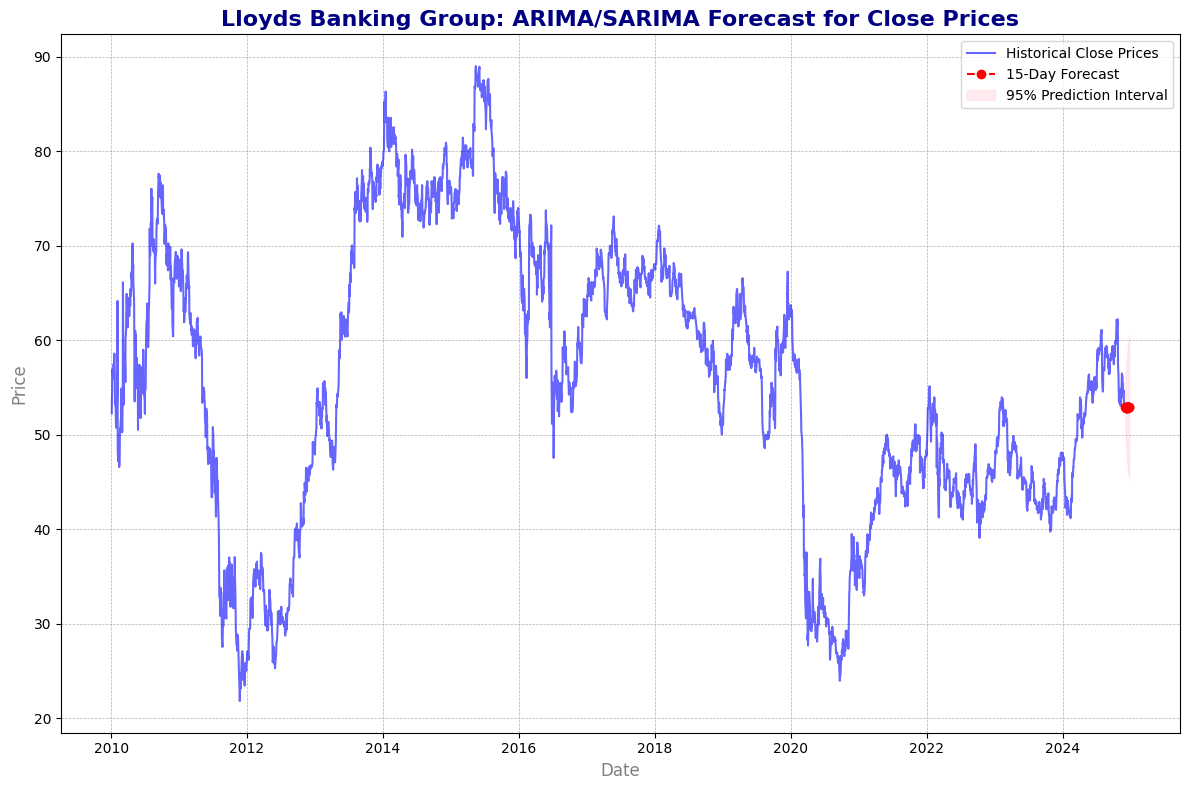

Forecasted Close Prices for the Next 15 Days of 2024:
           Date  Forecasted Close  Lower Bound  Upper Bound
3768 2024-12-04         52.902894    50.744529    55.061260
3769 2024-12-05         52.815481    49.793034    55.837928
3770 2024-12-06         52.800608    49.164246    56.436970
3771 2024-12-09         52.933841    48.774753    57.092929
3772 2024-12-10         52.966412    48.369713    57.563111
3773 2024-12-11         52.933047    47.938550    57.927545
3774 2024-12-12         52.888085    47.532550    58.243621
3775 2024-12-13         52.819268    47.118791    58.519745
3776 2024-12-16         52.945662    46.932746    58.958579
3777 2024-12-17         52.942053    46.645564    59.238541
3778 2024-12-18         52.888893    46.307699    59.470088
3779 2024-12-19         52.819691    45.961080    59.678302
3780 2024-12-20         52.968107    45.835877    60.100337
3781 2024-12-23         52.935873    45.552228    60.319518
3782 2024-12-24         52.942846    45.314374

In [15]:
forecast = best_model.get_forecast(steps=15)
forecast_values = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

# Generate future dates
future_dates = pd.date_range(start=close_prices.index[-1], periods=16, freq='B')[1:]  # 15 business days

# Create a DataFrame for the forecasted values
forecast_df = pd.DataFrame({
    'Date': future_dates,
    'Forecasted Close': forecast_values,
    'Lower Bound': forecast_conf_int.iloc[:, 0],
    'Upper Bound': forecast_conf_int.iloc[:, 1]
})

# Step 7: Plot the Historical Data and Forecast
plt.figure(figsize=(12, 8))
plt.plot(close_prices.index, close_prices, label='Historical Close Prices', color='blue', alpha=0.6)
plt.plot(forecast_df['Date'], forecast_df['Forecasted Close'], label='15-Day Forecast', color='red', linestyle='--', marker='o')
plt.fill_between(forecast_df['Date'], forecast_df['Lower Bound'], forecast_df['Upper Bound'], color='pink', alpha=0.3, label='95% Prediction Interval')
plt.title('Lloyds Banking Group: ARIMA/SARIMA Forecast for Close Prices', fontsize=16, color='navy', weight='bold')
plt.xlabel('Date', fontsize=12, color='gray')
plt.ylabel('Price', fontsize=12, color='gray')
plt.legend()
plt.grid(visible=True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

print("Forecasted Close Prices for the Next 15 Days of 2024:")
print(forecast_df)

# Step 8: Model Evaluation
y_true = close_prices[-15:]
y_forecasted = best_model.predict(start=len(close_prices) - 15, end=len(close_prices) - 1)

mse = mean_squared_error(y_true, y_forecasted)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true, y_forecasted)
r2 = r2_score(y_true, y_forecasted)

print("\nModel Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R²): {r2:.4f}")

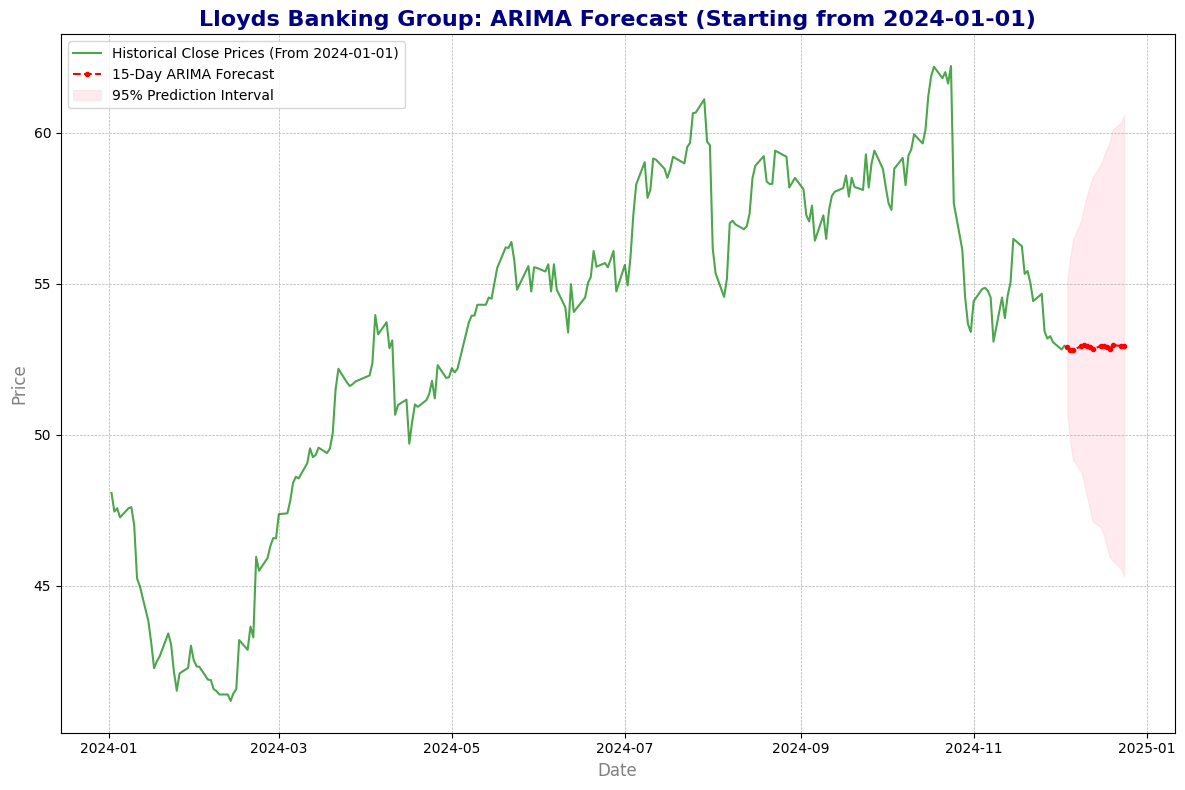

Forecasted Close Prices for the Next 15 Days of 2024:
           Date  Forecasted Close  Lower Bound  Upper Bound
3768 2024-12-04         52.902894    50.744529    55.061260
3769 2024-12-05         52.815481    49.793034    55.837928
3770 2024-12-06         52.800608    49.164246    56.436970
3771 2024-12-09         52.933841    48.774753    57.092929
3772 2024-12-10         52.966412    48.369713    57.563111
3773 2024-12-11         52.933047    47.938550    57.927545
3774 2024-12-12         52.888085    47.532550    58.243621
3775 2024-12-13         52.819268    47.118791    58.519745
3776 2024-12-16         52.945662    46.932746    58.958579
3777 2024-12-17         52.942053    46.645564    59.238541
3778 2024-12-18         52.888893    46.307699    59.470088
3779 2024-12-19         52.819691    45.961080    59.678302
3780 2024-12-20         52.968107    45.835877    60.100337
3781 2024-12-23         52.935873    45.552228    60.319518
3782 2024-12-24         52.942846    45.314374

In [16]:
# Filter historical data from 2024-01-01 onward
data.index = pd.to_datetime(data.index, format='%d-%m-%Y')  # Ensure the index is datetime
filtered_data = data[data.index >= '2024-01-01']

# Plot data from 2024-01-01 with forecast
plt.figure(figsize=(12, 8))
plt.plot(filtered_data.index, filtered_data['Close'], label='Historical Close Prices (From 2024-01-01)', color='green', alpha=0.7)
plt.plot(forecast_df['Date'], forecast_df['Forecasted Close'], label='15-Day ARIMA Forecast', color='red', linestyle='--', marker='.')
plt.fill_between(forecast_df['Date'], forecast_df['Lower Bound'], forecast_df['Upper Bound'], color='pink', alpha=0.3, label='95% Prediction Interval')
plt.title('Lloyds Banking Group: ARIMA Forecast (Starting from 2024-01-01)', fontsize=16, color='navy', weight='bold')
plt.xlabel('Date', fontsize=12, color='gray')
plt.ylabel('Price', fontsize=12, color='gray')
plt.legend()
plt.grid(visible=True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

# Display the forecasted values
print("Forecasted Close Prices for the Next 15 Days of 2024:")
print(forecast_df)


# Prophet

In [17]:
data.head(10)

Price,Adj Close,Close,High,Low,Open,Volume,MA_30,MA_90
Ticker,LLOY.L,LLOY.L,LLOY.L,LLOY.L,LLOY.L,LLOY.L,,
Date,,,,,,,,
2010-01-04,36.779499,52.259998,52.259998,51.099998,51.400002,167623403,NaN,NaN
2010-01-05,38.025185,54.029999,54.759998,52.200001,52.500000,233026957,NaN,NaN
2010-01-06,38.419304,54.590000,55.230000,53.169998,55.000000,142079248,NaN,NaN
2010-01-07,40.066151,56.930000,57.070000,54.000000,54.860001,216171360,NaN,NaN
2010-01-08,40.045033,56.900002,57.520000,56.160000,56.990002,178033888,NaN,NaN
2010-01-11,39.503124,56.130001,57.950001,55.630001,57.799999,169834032,NaN,NaN
2010-01-12,39.390514,55.970001,56.290001,55.080002,55.590000,189050155,NaN,NaN
2010-01-13,39.411633,56.000000,56.200001,55.160000,55.639999,117598072,NaN,NaN


In [18]:
# If 'Date' is the index, reset it to make it a regular column
if 'Date' not in data.columns:
    data.reset_index(inplace=True)

# Select only 'Date' and 'Close' columns
data_for_prophet = data[['Date', 'Close']].copy()

# Rename the columns for Prophet
data_for_prophet.columns = ['ds', 'y']

# Drop rows with NaN values (if any)
data_for_prophet.dropna(subset=['ds', 'y'], inplace=True)

# Ensure 'y' is numeric
data_for_prophet['y'] = pd.to_numeric(data_for_prophet['y'], errors='coerce')
data_for_prophet.dropna(subset=['y'], inplace=True)  # Drop rows where 'y' is still NaN

# Convert 'ds' column to datetime with the correct format
data_for_prophet['ds'] = pd.to_datetime(data_for_prophet['ds'], format='%d-%m-%Y')

# Display the prepared data
print(data_for_prophet.head(10))

          ds          y
0 2010-01-04  52.259998
1 2010-01-05  54.029999
2 2010-01-06  54.590000
3 2010-01-07  56.930000
4 2010-01-08  56.900002
5 2010-01-11  56.130001
6 2010-01-12  55.970001
7 2010-01-13  56.000000
8 2010-01-14  57.500000
9 2010-01-15  56.779999


In [19]:
# Define and customize the Prophet model
prophet_model = Prophet(
    growth="linear",                 # Set growth type (linear or logistic)
    seasonality_mode="multiplicative",  # Use multiplicative seasonality for stock price data
    yearly_seasonality=True,         # Enable yearly seasonality
    weekly_seasonality=True,         # Enable weekly seasonality
    daily_seasonality=False,         # Disable daily seasonality
    changepoint_prior_scale=0.1,     # Adjust flexibility for trend changes
    seasonality_prior_scale=10,      # Control seasonal flexibility
    interval_width=0.95              # 95% prediction interval
)

# Add custom seasonalities
prophet_model.add_seasonality(name='monthly', period=30.5, fourier_order=5)
prophet_model.add_seasonality(name='quarterly', period=91.25, fourier_order=8)
prophet_model.add_seasonality(name='biweekly', period=14, fourier_order=3)

# Add holiday effects for the UK
prophet_model.add_country_holidays(country_name='UK')

# Fit the model
prophet_model.fit(data_for_prophet)


DEBUG:cmdstanpy:input tempfile: /tmp/tmpx2thh0vg/8saiedv9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx2thh0vg/ibzaa9ya.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23269', 'data', 'file=/tmp/tmpx2thh0vg/8saiedv9.json', 'init=/tmp/tmpx2thh0vg/ibzaa9ya.json', 'output', 'file=/tmp/tmpx2thh0vg/prophet_model8x4pvy41/prophet_model-20241204131641.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:16:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:17:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [20]:
# @title
# # Initialize and fit the Prophet model
# prophet_model = Prophet()
# prophet_model.fit(data_for_prophet)

In [21]:
# Forecast for the next 15 business days
future = prophet_model.make_future_dataframe(periods=15, freq='B')  # Business days
forecast = prophet_model.predict(future)

# Extract the forecasted values
forecasted_values = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

# Filter future predictions (next 15 days)
future_predictions = forecasted_values[forecasted_values['ds'] > data_for_prophet['ds'].max()]

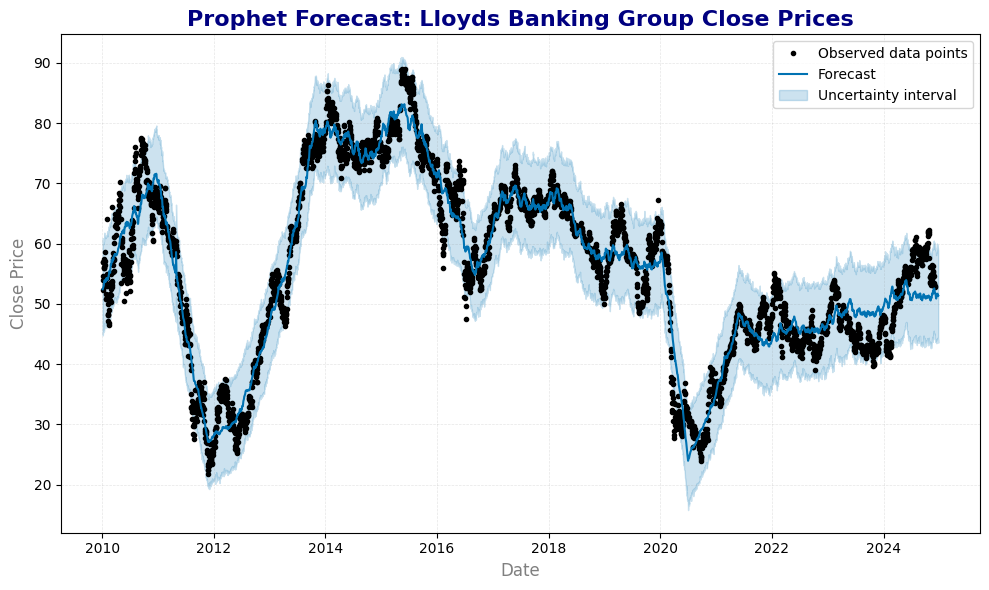

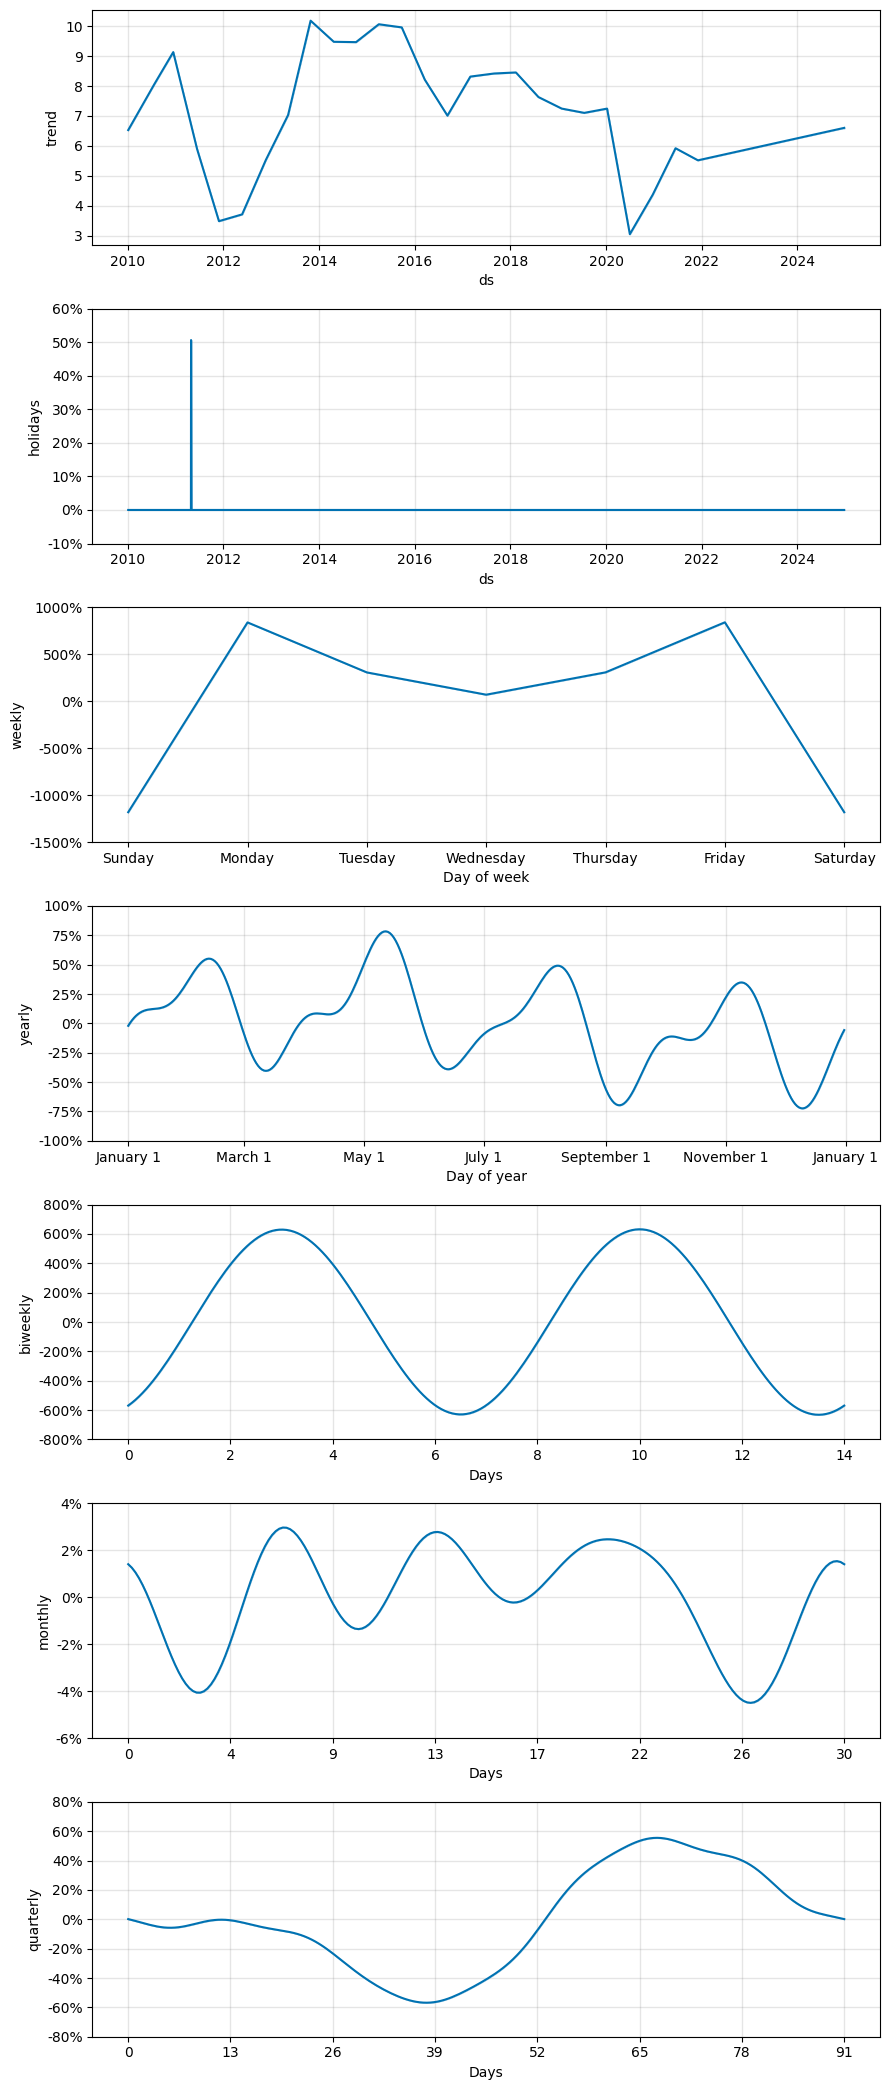

In [22]:
# Plot historical data and forecast
prophet_model.plot(forecast)
plt.title('Prophet Forecast: Lloyds Banking Group Close Prices', fontsize=16, color='navy', weight='bold')
plt.xlabel('Date', fontsize=12, color='gray')
plt.ylabel('Close Price', fontsize=12, color='gray')
plt.grid(visible=True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.legend()
plt.show()

# Component plots
prophet_model.plot_components(forecast)
plt.tight_layout()
plt.show()

RMSE: 3.8578
MSE: 14.8828
MAE: 3.0085


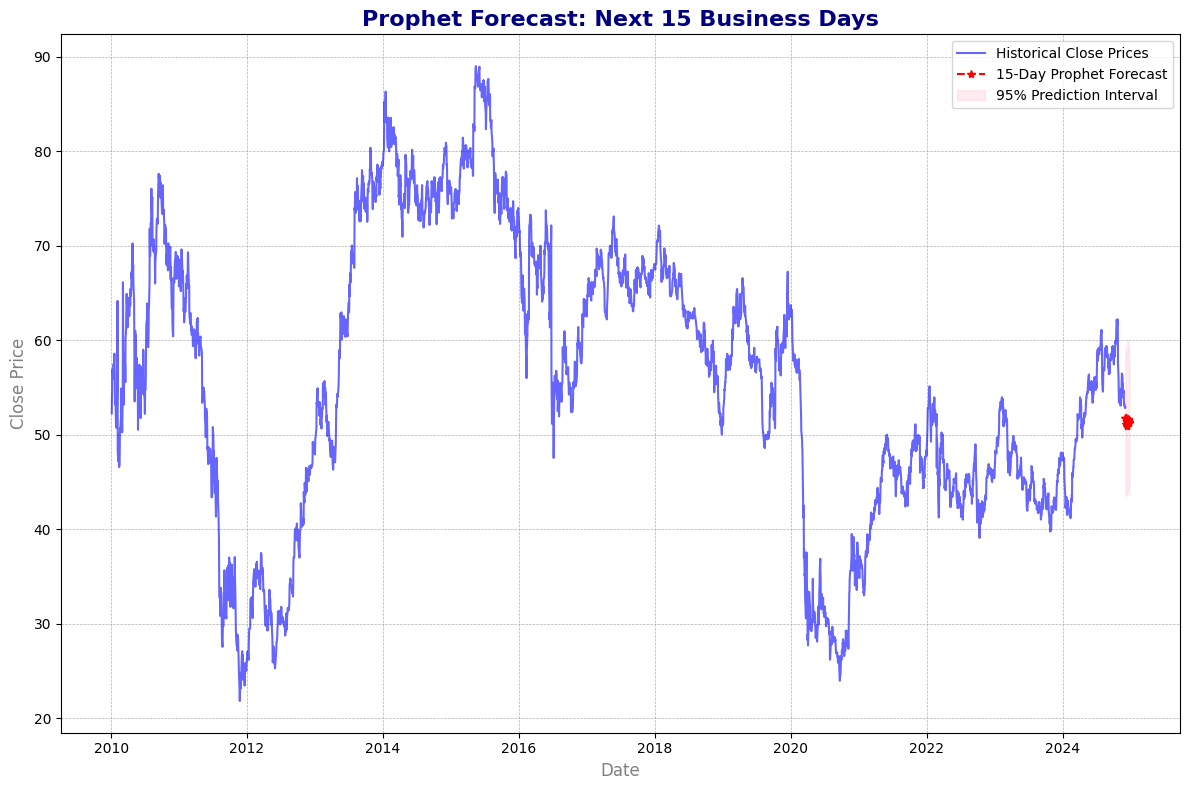

Forecasted Close Prices for the Next 15 Business Days:
             ds       yhat  yhat_lower  yhat_upper
3768 2024-12-04  51.764606   44.253908   59.358982
3769 2024-12-05  51.811941   43.716575   59.041432
3770 2024-12-06  51.757231   43.822420   58.897827
3771 2024-12-09  51.118716   43.599926   58.708020
3772 2024-12-10  50.935370   43.807778   58.111702
3773 2024-12-11  50.892876   43.836548   58.697698
3774 2024-12-12  51.090204   43.481812   58.589142
3775 2024-12-13  51.322369   43.789630   58.542182
3776 2024-12-16  51.364813   44.183300   60.032786
3777 2024-12-17  51.448821   43.975209   58.690490
3778 2024-12-18  51.583119   43.883806   59.151169
3779 2024-12-19  51.708063   44.384443   59.030266
3780 2024-12-20  51.662101   44.413447   59.789311
3781 2024-12-23  51.287562   44.079164   59.027843
3782 2024-12-24  51.359383   43.579220   58.902442


In [23]:
# Filter historical predictions for RMSE/MSE/MAE calculation
historical_forecast = forecast[forecast['ds'] <= data_for_prophet['ds'].max()]

# Calculate RMSE, MSE, and MAE
rmse = np.sqrt(mean_squared_error(data_for_prophet['y'], historical_forecast['yhat']))
mse = mean_squared_error(data_for_prophet['y'], historical_forecast['yhat'])
mae = mean_absolute_error(data_for_prophet['y'], historical_forecast['yhat'])

print(f"RMSE: {rmse:.4f}")
print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")

# Plot future predictions only
plt.figure(figsize=(12, 8))
plt.plot(data_for_prophet['ds'], data_for_prophet['y'], label='Historical Close Prices', color='blue', alpha=0.6)
plt.plot(future_predictions['ds'], future_predictions['yhat'], label='15-Day Prophet Forecast', color='red', linestyle='--', marker='*')
plt.fill_between(future_predictions['ds'],
                 future_predictions['yhat_lower'],
                 future_predictions['yhat_upper'],
                 color='pink', alpha=0.3, label='95% Prediction Interval')
plt.title('Prophet Forecast: Next 15 Business Days', fontsize=16, color='navy', weight='bold')
plt.xlabel('Date', fontsize=12, color='gray')
plt.ylabel('Close Price', fontsize=12, color='gray')
plt.legend()
plt.grid(visible=True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

# Display the forecasted values for the next 15 days
print("Forecasted Close Prices for the Next 15 Business Days:")
print(future_predictions)


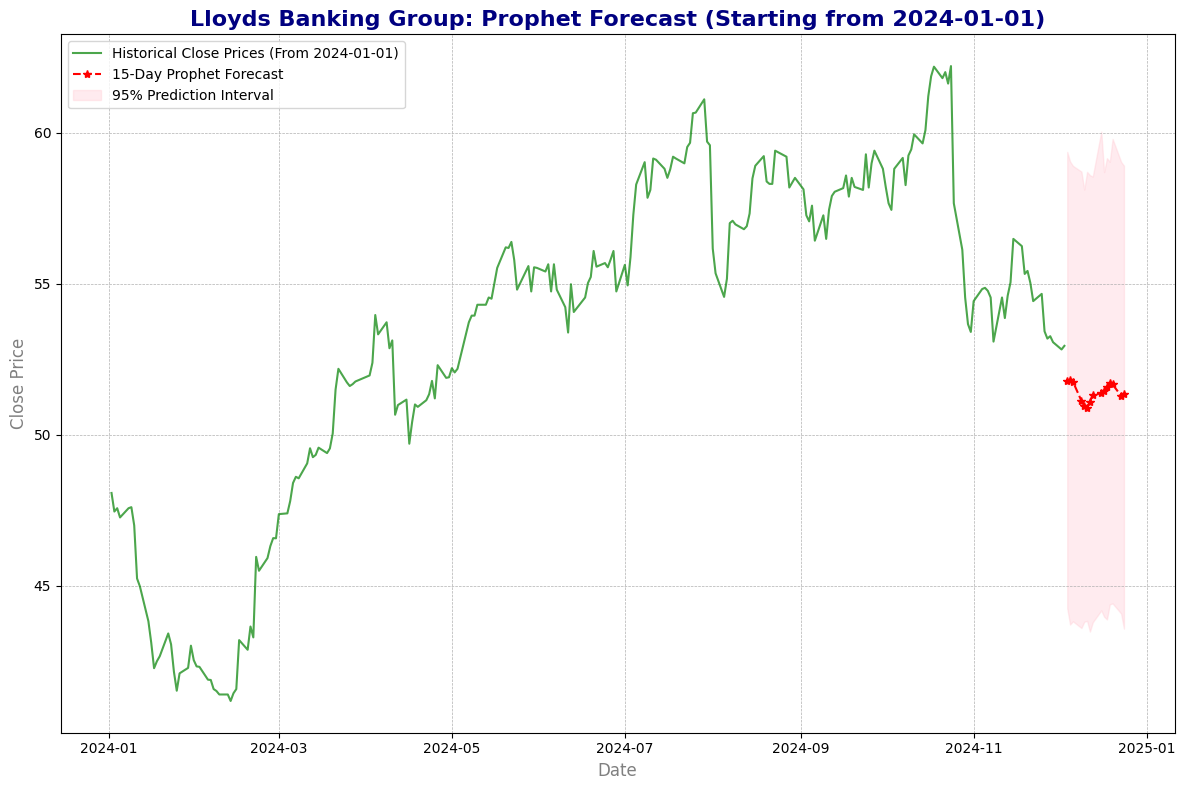

Forecasted Close Prices for the Next 15 Business Days:
             ds       yhat  yhat_lower  yhat_upper
3768 2024-12-04  51.764606   44.253908   59.358982
3769 2024-12-05  51.811941   43.716575   59.041432
3770 2024-12-06  51.757231   43.822420   58.897827
3771 2024-12-09  51.118716   43.599926   58.708020
3772 2024-12-10  50.935370   43.807778   58.111702
3773 2024-12-11  50.892876   43.836548   58.697698
3774 2024-12-12  51.090204   43.481812   58.589142
3775 2024-12-13  51.322369   43.789630   58.542182
3776 2024-12-16  51.364813   44.183300   60.032786
3777 2024-12-17  51.448821   43.975209   58.690490
3778 2024-12-18  51.583119   43.883806   59.151169
3779 2024-12-19  51.708063   44.384443   59.030266
3780 2024-12-20  51.662101   44.413447   59.789311
3781 2024-12-23  51.287562   44.079164   59.027843
3782 2024-12-24  51.359383   43.579220   58.902442


In [24]:
# Ensure the 'ds' column is in datetime format
data_for_prophet['ds'] = pd.to_datetime(data_for_prophet['ds'])

# Filter the historical data from 2024-01-01 onward
filtered_data_prophet = data_for_prophet[data_for_prophet['ds'] >= '2024-01-01']


# Plot data from 2024-01-01 with forecast
plt.figure(figsize=(12, 8))
plt.plot(filtered_data_prophet['ds'], filtered_data_prophet['y'], label='Historical Close Prices (From 2024-01-01)', color='green', alpha=0.7)
plt.plot(future_predictions['ds'], future_predictions['yhat'], label='15-Day Prophet Forecast', color='red', linestyle='--', marker='*')
plt.fill_between(future_predictions['ds'],
                 future_predictions['yhat_lower'],
                 future_predictions['yhat_upper'],
                 color='pink', alpha=0.3, label='95% Prediction Interval')
plt.title('Lloyds Banking Group: Prophet Forecast (Starting from 2024-01-01)', fontsize=16, color='navy', weight='bold')
plt.xlabel('Date', fontsize=12, color='gray')
plt.ylabel('Close Price', fontsize=12, color='gray')
plt.legend()
plt.grid(visible=True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

# Display the forecasted values
print("Forecasted Close Prices for the Next 15 Business Days:")
print(future_predictions)


# HOLT - WINTERS Model

In [57]:
data.head(10)

Price,Date,Adj Close,Close,High,Low,Open,Volume,MA_30,MA_90
Ticker,,LLOY.L,LLOY.L,LLOY.L,LLOY.L,LLOY.L,LLOY.L,,
0,2010-01-04,36.779499,52.259998,52.259998,51.099998,51.400002,167623403,NaN,NaN
1,2010-01-05,38.025185,54.029999,54.759998,52.200001,52.500000,233026957,NaN,NaN
2,2010-01-06,38.419304,54.590000,55.230000,53.169998,55.000000,142079248,NaN,NaN
3,2010-01-07,40.066151,56.930000,57.070000,54.000000,54.860001,216171360,NaN,NaN
4,2010-01-08,40.045033,56.900002,57.520000,56.160000,56.990002,178033888,NaN,NaN
5,2010-01-11,39.503124,56.130001,57.950001,55.630001,57.799999,169834032,NaN,NaN
6,2010-01-12,39.390514,55.970001,56.290001,55.080002,55.590000,189050155,NaN,NaN
7,2010-01-13,39.411633,56.000000,56.200001,55.160000,55.639999,117598072,NaN,NaN
8,2010-01-14,40.467300,57.500000,58.000000,56.580002,57.000000,225878876,NaN,NaN


In [58]:
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')

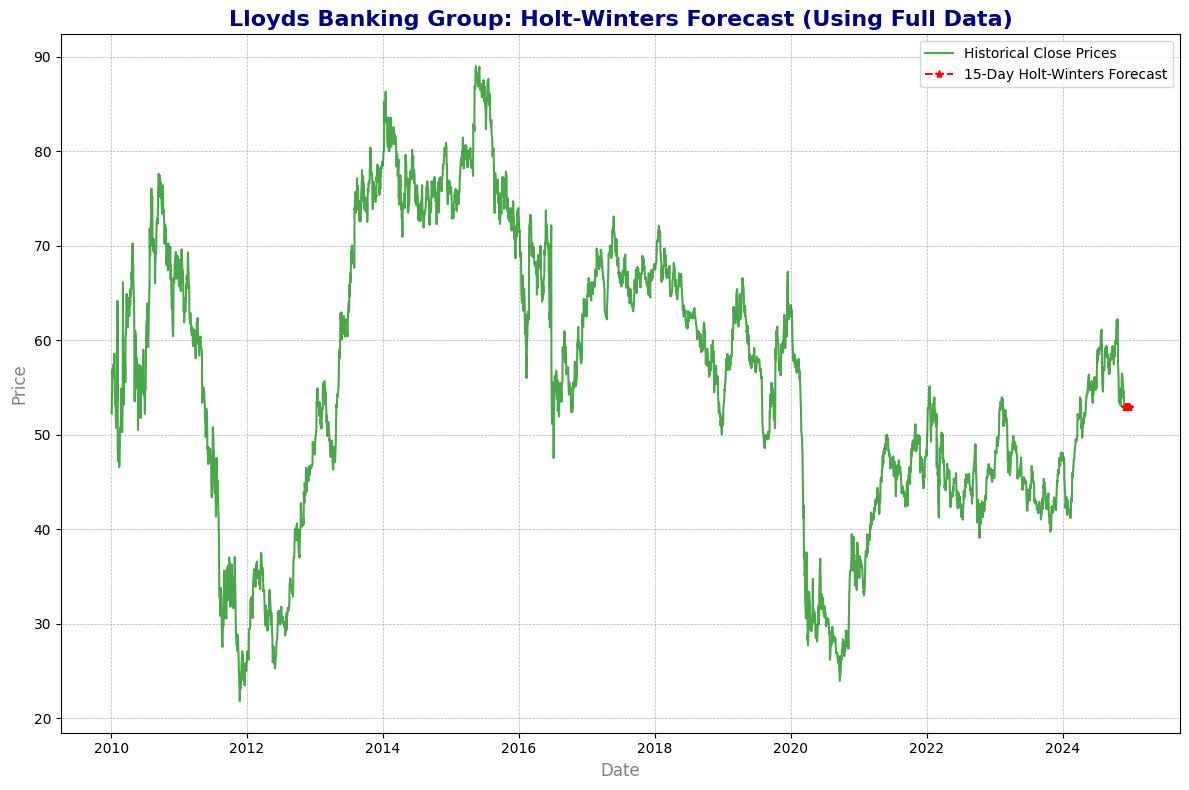

In [59]:
# Ensure 'Date' is in datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Use the full dataset and rename it to data_hw
data_hw = data.copy()

# Build the Holt-Winters Model using the full dataset
holt_winters_model = ExponentialSmoothing(data_hw['Close'],
                                          trend='add',   # Additive trend
                                          seasonal='add', # Additive seasonality
                                          seasonal_periods=5)  # Adjust seasonal_periods based on the data pattern
holt_winters_model_fit = holt_winters_model.fit()

# Forecast the next 15 business days
forecast_holt_winters = holt_winters_model_fit.forecast(steps=15)

# Create a DataFrame to hold the forecasted values
forecast_dates = pd.date_range(start=data_hw['Date'].max(), periods=16, freq='B')[1:]
forecast_df = pd.DataFrame({
    'Date': forecast_dates,
    'Forecasted Close': forecast_holt_winters
})

# Plot historical data and forecast
plt.figure(figsize=(12, 8))
plt.plot(data_hw['Date'], data_hw['Close'], label='Historical Close Prices', color='green', alpha=0.7)
plt.plot(forecast_df['Date'], forecast_df['Forecasted Close'], label='15-Day Holt-Winters Forecast', color='red', linestyle='--', marker='*')
plt.title('Lloyds Banking Group: Holt-Winters Forecast (Using Full Data)', fontsize=16, color='navy', weight='bold')
plt.xlabel('Date', fontsize=12, color='gray')
plt.ylabel('Price', fontsize=12, color='gray')
plt.legend()
plt.grid(visible=True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


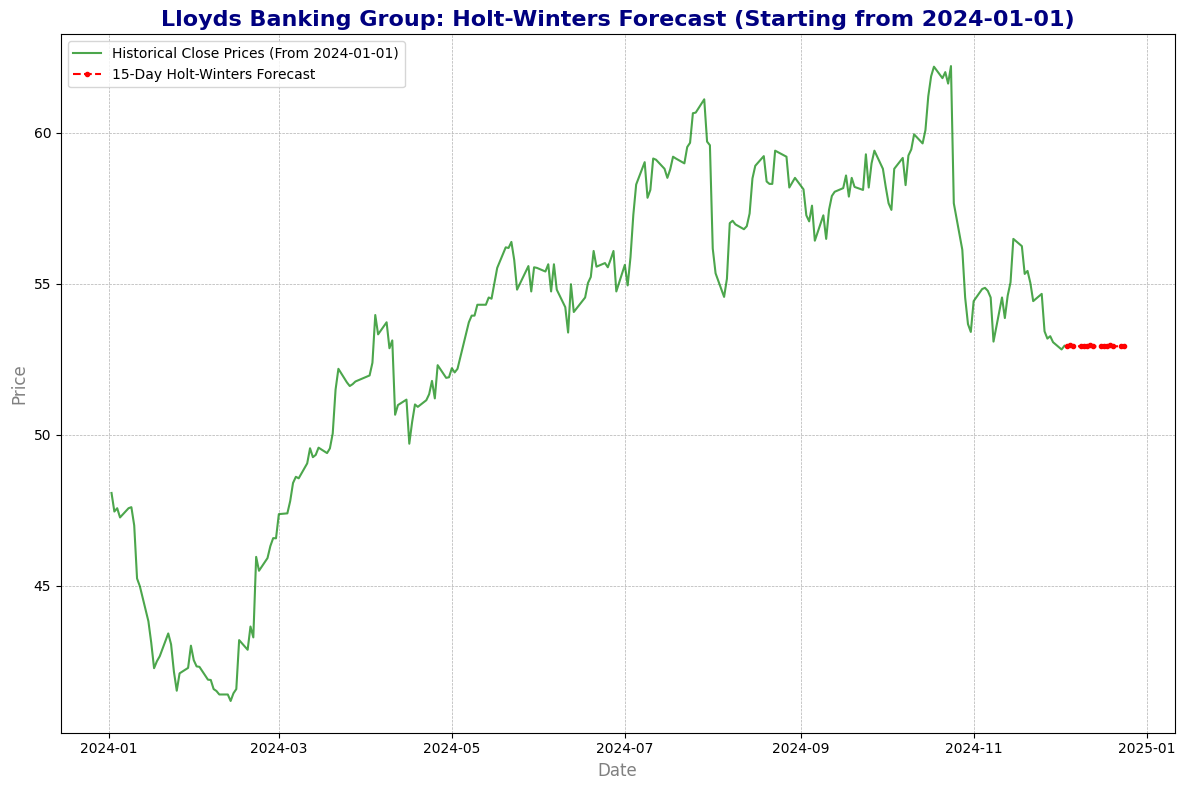

Forecasted Close Prices for the Next 15 Days of 2024:
           Date  Forecasted Close
3768 2024-12-04         52.948861
3769 2024-12-05         52.963140
3770 2024-12-06         52.918458
3771 2024-12-09         52.928619
3772 2024-12-10         52.937280
3773 2024-12-11         52.949651
3774 2024-12-12         52.963930
3775 2024-12-13         52.919249
3776 2024-12-16         52.929409
3777 2024-12-17         52.938070
3778 2024-12-18         52.950441
3779 2024-12-19         52.964720
3780 2024-12-20         52.920039
3781 2024-12-23         52.930199
3782 2024-12-24         52.938860


In [60]:
# Ensure 'Date' is in datetime format and set it as the index
data_hw['Date'] = pd.to_datetime(data_hw['Date'])
data_hw = data_hw.set_index('Date')

# Filter historical data from 2024-01-01 onward using the 'Date' index
filtered_df = data_hw[data_hw.index >= '2024-01-01']

# Plot data from 2024-01-01 with forecast
plt.figure(figsize=(12, 8))
plt.plot(filtered_df.index, filtered_df['Close'], label='Historical Close Prices (From 2024-01-01)', color='green', alpha=0.7)
plt.plot(forecast_df['Date'], forecast_df['Forecasted Close'], label='15-Day Holt-Winters Forecast', color='red', linestyle='--', marker='.')
plt.title('Lloyds Banking Group: Holt-Winters Forecast (Starting from 2024-01-01)', fontsize=16, color='navy', weight='bold')
plt.xlabel('Date', fontsize=12, color='gray')
plt.ylabel('Price', fontsize=12, color='gray')
plt.legend()
plt.grid(visible=True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

# Display the forecasted values
print("Forecasted Close Prices for the Next 15 Days of 2024:")
print(forecast_df)


In [80]:
data_hw.head(10)

Price,Adj Close,Close,High,Low,Open,Volume,MA_30,MA_90
Ticker,LLOY.L,LLOY.L,LLOY.L,LLOY.L,LLOY.L,LLOY.L,,
Date,,,,,,,,
2010-01-04,36.779499,52.259998,52.259998,51.099998,51.400002,167623403,NaN,NaN
2010-01-05,38.025185,54.029999,54.759998,52.200001,52.500000,233026957,NaN,NaN
2010-01-06,38.419304,54.590000,55.230000,53.169998,55.000000,142079248,NaN,NaN
2010-01-07,40.066151,56.930000,57.070000,54.000000,54.860001,216171360,NaN,NaN
2010-01-08,40.045033,56.900002,57.520000,56.160000,56.990002,178033888,NaN,NaN
2010-01-11,39.503124,56.130001,57.950001,55.630001,57.799999,169834032,NaN,NaN
2010-01-12,39.390514,55.970001,56.290001,55.080002,55.590000,189050155,NaN,NaN
2010-01-13,39.411633,56.000000,56.200001,55.160000,55.639999,117598072,NaN,NaN


In [78]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import math

original_values = data['Close']
predicted_values = forecast_df['Forecasted Close']

# Inverse transform the scaled predictions and true values
original_values = actual_values.values.reshape(-1, 1)
predicted_values = forecast_df['Forecasted Close'].values.reshape(-1, 1)

original_values = scaler.inverse_transform(original_values).flatten()
predicted_values = scaler.inverse_transform(predicted_values).flatten()

# Calculate evaluation metrics
mse = mean_squared_error(original_values, predicted_values)
rmse = math.sqrt(mse)
mae = mean_absolute_error(original_values, predicted_values)
r2 = r2_score(original_values, predicted_values)

# Print the evaluation metrics
print("Test Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R²): {r2:.4f}")


ValueError: Input contains NaN.

In [74]:
# Inverse transform the scaled predictions and true values
original_values = data_hw['Close']
predicted_values = forecast_df['Forecasted Close']

original_values = scaler.inverse_transform(original_values.values.reshape(-1, 1)).flatten()
predicted_values = scaler.inverse_transform(predicted_values.values.reshape(-1, 1)).flatten()

# Calculate evaluation metrics
mse = mean_squared_error(original_values, predicted_values)
rmse = math.sqrt(mse)
mae = mean_absolute_error(original_values, y_pred_original)
r2 = r2_score(original_values, y_pred_original)

# Print the evaluation metrics
print("Test Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R²): {r2:.4f}")


ValueError: Found input variables with inconsistent numbers of samples: [3768, 15]